<a href="https://colab.research.google.com/github/rickwag/ML/blob/main/MNISTNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
data_url = "/content/sample_data/mnist_train_small.csv"

In [23]:
import pandas as pd

df = pd.read_csv(data_url)
df.head(5)

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.shape

(19999, 785)

In [25]:
import matplotlib.pyplot as plt

def show_digit(pixel_data, title = "digit"):
  digit = pixel_data.to_numpy().reshape((28, 28))

  plt.title(title)
  plt.gray()
  plt.imshow(digit)
  plt.show()

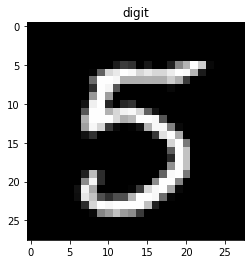

In [26]:
show_digit(df.iloc[0, 1:])

In [27]:
#train test split
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=.2)

In [28]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(15999, 784)
(15999,)
(4000, 784)
(4000,)


In [29]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [30]:
y_train_cat.shape

(15999, 10)

In [31]:
#model creation
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=128, activation="relu", input_shape=(784, )))
model.add(Dense(units=128, activation="relu"))

model.add(Dense(units=10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [32]:
#model training
model.fit(X_train, y_train_cat, epochs=5, batch_size=64)

Epoch 1/5
250/250 [==============================] - 1s 3ms/step - loss: 4.9586 - accuracy: 0.8108
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.9756 - accuracy: 0.9034
Epoch 3/5
250/250 [==============================] - 1s 3ms/step - loss: 0.5935 - accuracy: 0.9290
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3619 - accuracy: 0.9444
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3261 - accuracy: 0.9524


In [33]:
#model evaluation
model.evaluate(X_test, y_test_cat, batch_size=64)

63/63 [==============================] - 0s 3ms/step - loss: 0.6447 - accuracy: 0.9337


[0.6446903944015503, 0.9337499737739563]

In [34]:
predictions = model.predict(X_test)

In [37]:
from numpy import argmax
def get_prediction_at_index(index):
  return argmax(predictions[index])

get_prediction_at_index(0)

7

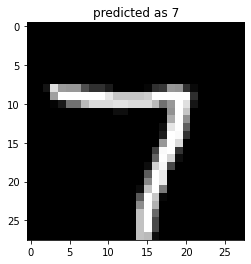

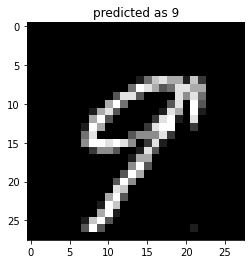

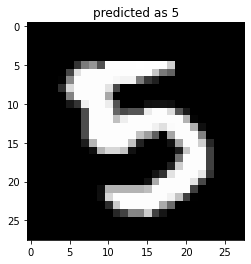

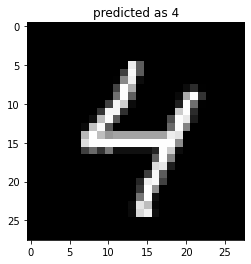

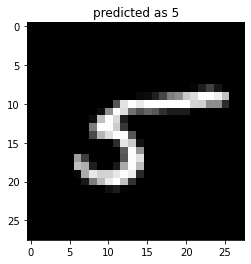

In [38]:
for n in range(5):
  show_digit(X_test.iloc[n, :], "predicted as " + str(get_prediction_at_index(n)))

In [41]:
predictions.shape

(4000, 10)

In [43]:
#confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)
cm

array([[376,   0,   3,   1,   0,   0,   1,   3,   2,   0],
       [  0, 462,   2,   1,   1,   0,   1,   1,   1,   2],
       [  2,   8, 373,   3,   3,   0,   4,   3,  10,   1],
       [  0,   1,   7, 354,   0,   3,   1,   0,  16,   5],
       [  0,   0,   4,   0, 350,   0,   3,   5,   1,  14],
       [  3,   2,   2,  13,   4, 305,   2,   0,  18,   2],
       [  4,   1,   2,   0,   2,   4, 384,   2,   8,   0],
       [  0,   3,   6,   2,   3,   0,   0, 408,   2,   7],
       [  0,   6,   1,   2,   2,   2,   1,   1, 339,   5],
       [  1,   1,   0,   6,  14,   1,   0,   6,  11, 384]])

Text(69.0, 0.5, 'truth')

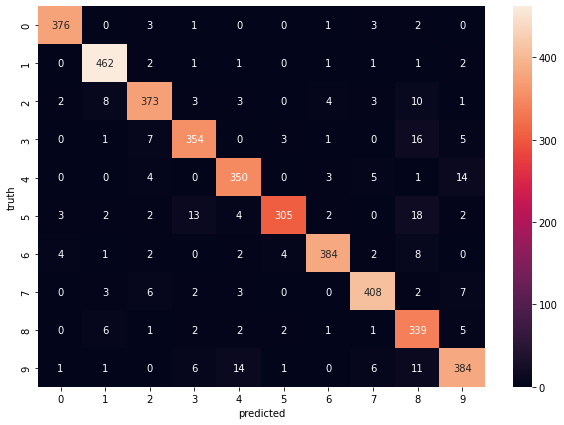

In [49]:
import seaborn as sb 

plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt="d")

plt.xlabel("predicted")
plt.ylabel("truth")